In [1]:
# Assignment 3
# Sayali Shende
# ALY 6020 _ Logistic and SVM




In [2]:
# Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# Loading data

DF = pd.read_csv('Marketing_Campaign.csv')

# Display the first few rows of the dataset
DF.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,46,27,15,5,5,3,6,5,0,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,0,42,14,2,6,4,10,6,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,11/13/2012,34,235,...,50,49,27,4,7,3,7,6,0,0
7,6177,1985,PhD,Married,33454.0,1,0,5/8/2013,32,76,...,3,1,23,2,4,0,4,8,0,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,3,3,2,1,3,0,2,9,0,1
9,5899,1950,PhD,Together,5648.0,1,1,3/13/2014,68,28,...,1,1,13,1,1,0,0,20,0,0


In [4]:
## PART 1: DATA CLEANING

# Data Prep : Data information

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Checking for nulls

DF.isnull().sum()  # 24 nulls in Income

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [6]:
# Calculate the percentage of NaN values in the 'Income' column
Missing_percent = (DF['Income'].isna().sum() / len(DF)) * 100

print(f"Percentage of NaN values in the 'Income' column: {Missing_percent:.2f}%")

Percentage of NaN values in the 'Income' column: 1.07%


In [7]:
# Checking for '?' in each variable

for column in DF.columns:
    if DF[column].dtype in [int, float, object]:
        # Check for '?' only in columns with 'object' dtype (strings)
        question_mark_count = (DF[column] == '?').sum()
        
        if question_mark_count > 0:
            print(f"Column '{column}' has {question_mark_count} '?' values.")
            
# Flag to check if any columns have missing data
missing_data_found = False

# Print a message if no columns have missing data
if not missing_data_found:
    print("No columns have missing data with question marks.")

No columns have missing data with question marks.


In [8]:
# Drop rows with NaN values in the 'Income' column
DF_new = DF.dropna(subset=['Income'])

# Checking if the NaN is removed (row 10)
DF_new.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,46,27,15,5,5,3,6,5,0,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,0,42,14,2,6,4,10,6,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,11/13/2012,34,235,...,50,49,27,4,7,3,7,6,0,0
7,6177,1985,PhD,Married,33454.0,1,0,5/8/2013,32,76,...,3,1,23,2,4,0,4,8,0,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,3,3,2,1,3,0,2,9,0,1
9,5899,1950,PhD,Together,5648.0,1,1,3/13/2014,68,28,...,1,1,13,1,1,0,0,20,0,0


In [9]:
# Adding Year column extracted from the Dt_Customer column

DF_new['Year'] = pd.to_datetime(DF_new['Dt_Customer']).dt.year
DF_new.head()
DF_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

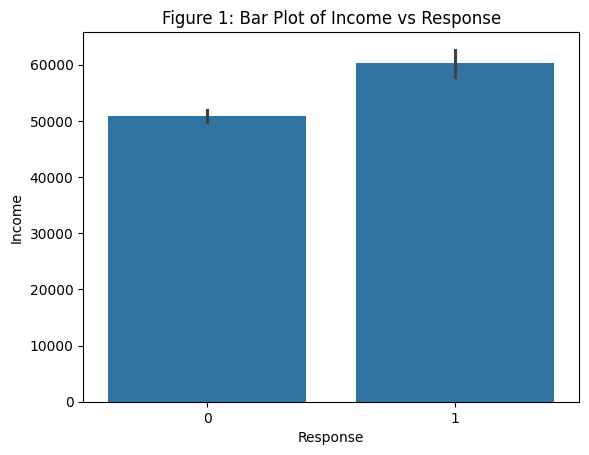

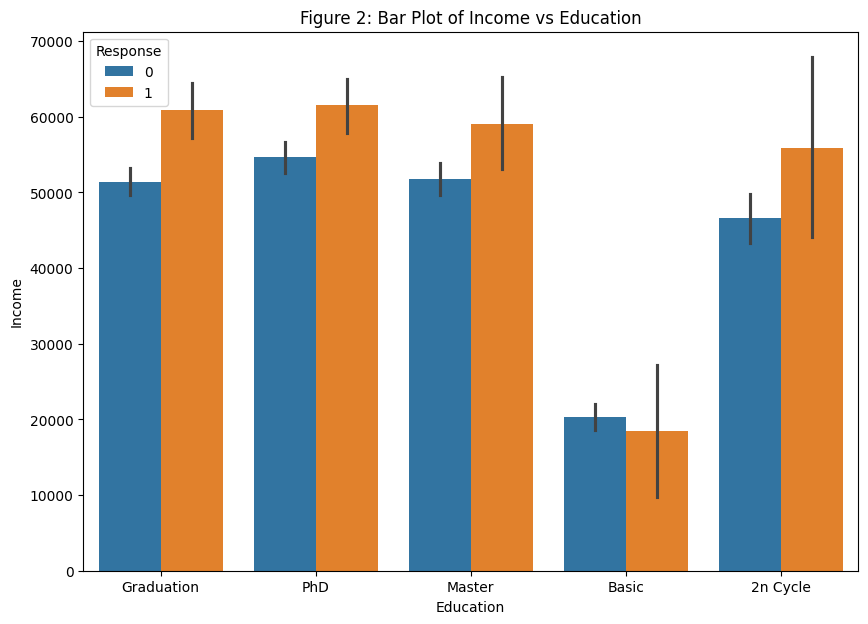

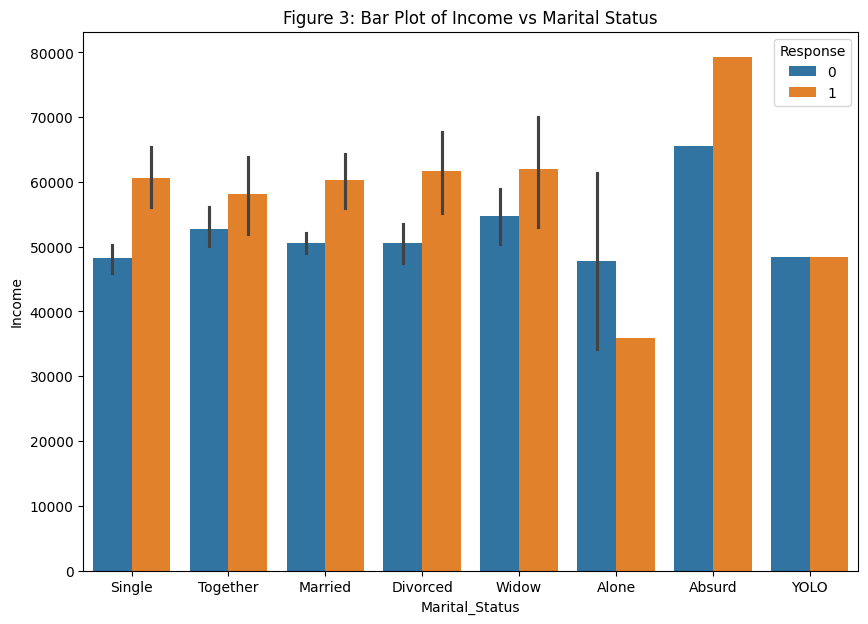

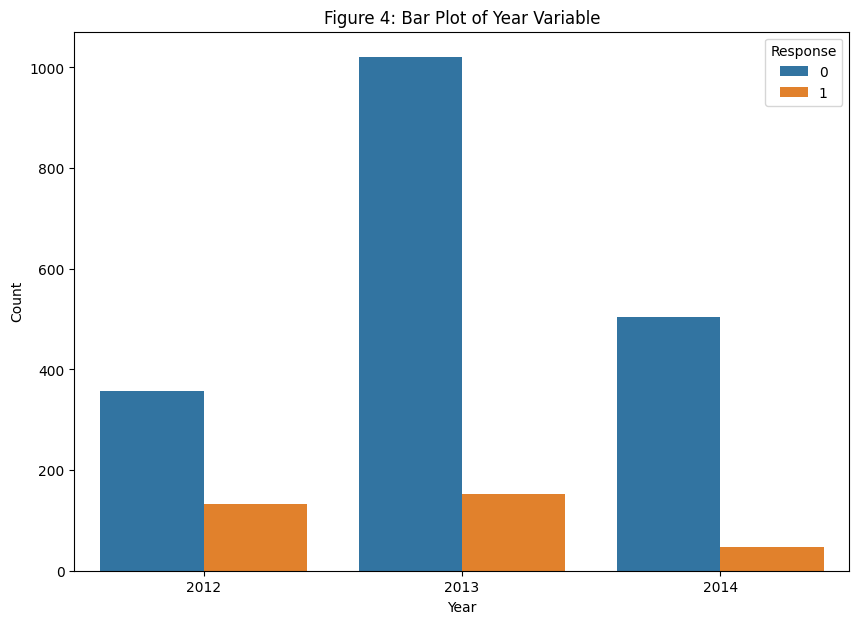

In [10]:
# Exploratory Data Analysis

# Create a bar plot for 'Income' against 'Response'
sns.barplot(x='Response', y='Income', data=DF_new)
plt.title('Figure 1: Bar Plot of Income vs Response')
plt.show()


# Create a bar plot for 'Income' against 'Education'
plt.figure(figsize=(10, 7))
sns.barplot(x='Education', y='Income', hue='Response', data=DF_new)
plt.title('Figure 2: Bar Plot of Income vs Education')
plt.show()


# Create a bar plot for 'Income' against 'Martial status'
plt.figure(figsize=(10, 7))
sns.barplot(x='Marital_Status', y='Income', hue='Response', data=DF_new)
plt.title('Figure 3: Bar Plot of Income vs Marital Status')
plt.show()

# Create a bar plot for the 'Year' variable
plt.figure(figsize=(10, 7))
sns.countplot(x='Year', data=DF_new, hue='Response')
plt.title('Figure 4: Bar Plot of Year Variable')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

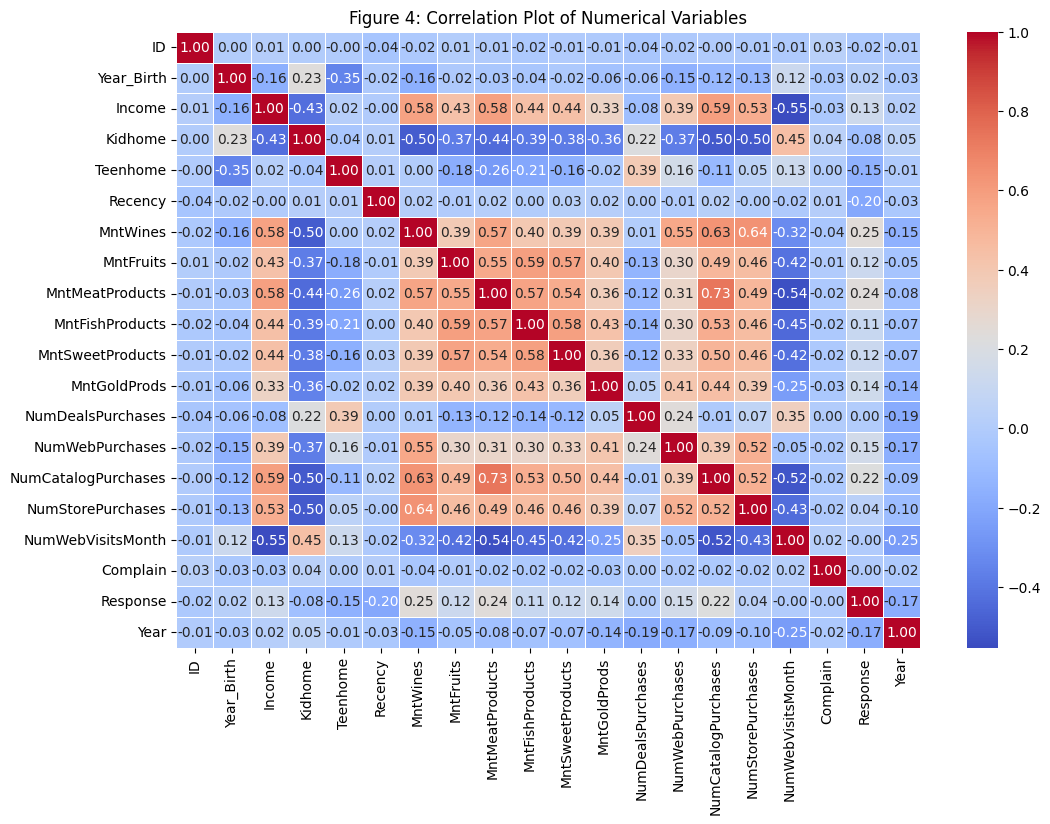

In [11]:
# Select all numerical columns
num_col_all = DF_new.select_dtypes(include=['int64', 'float64', 'int32']).columns


# Create a correlation matrix
corr_matrix = DF_new[num_col_all].corr()

# Create a correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Figure 4: Correlation Plot of Numerical Variables')
plt.show()

In [12]:
### PART B: LOGISTIC REGRESSION


# One hot encoding and normalization:

X = DF_new.drop(['ID', 'Response', 'Dt_Customer'], axis=1)  # Exclude 'ID' and 'Response'
y = DF_new['Response']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['Education', 'Marital_Status'], drop_first=True)

# Normalize the dataset using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Convert the normalized array back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X_encoded.columns)



In [13]:
# Data split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)


In [14]:
# Modeling: Logistic regression:
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Get the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Print the coefficients
print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(X_encoded.columns, coefficients):
    print(f"{feature}: {coef}")



Intercept: -2.4480984919754807
Coefficients:
Year_Birth: 0.030256894125089612
Income: 0.07353153110060906
Kidhome: 0.18412874080186412
Teenhome: -0.5443337907138678
Recency: -0.7823646766929689
MntWines: 0.50694431763545
MntFruits: 0.05257224983183517
MntMeatProducts: 0.3544137402154374
MntFishProducts: -0.001139532468309757
MntSweetProducts: -0.008660243180420033
MntGoldProds: 0.14788020375707628
NumDealsPurchases: 0.045683055219788264
NumWebPurchases: 0.2183481427609901
NumCatalogPurchases: 0.47266546882847255
NumStorePurchases: -0.6465883459848722
NumWebVisitsMonth: 0.36267486469513793
Complain: 0.011808826941743018
Year: -0.5407317333042585
Education_Basic: -0.2015318496337648
Education_Graduation: -0.04751179402842907
Education_Master: 0.023887653619626234
Education_PhD: 0.25226715861078997
Marital_Status_Alone: 0.08670240277038996
Marital_Status_Divorced: 0.08751645369798153
Marital_Status_Married: -0.39607512546284485
Marital_Status_Single: 0.042019114253986654
Marital_Status_To

In [15]:
# Evaluating the LOGISTIC REGRESSION model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8603603603603603
Confusion Matrix:
 [[357  25]
 [ 37  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       382
           1       0.50      0.40      0.45        62

    accuracy                           0.86       444
   macro avg       0.70      0.67      0.68       444
weighted avg       0.85      0.86      0.85       444



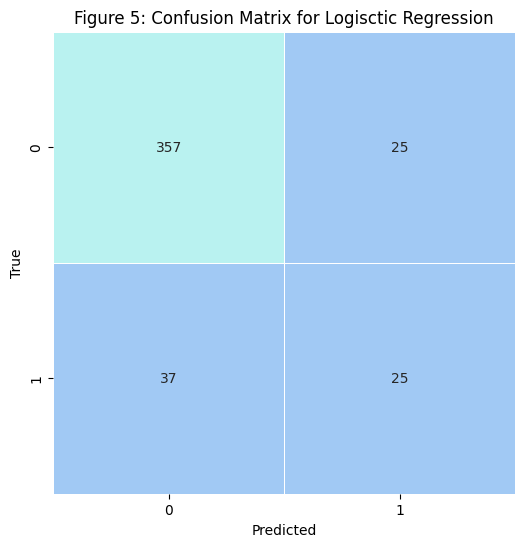

In [22]:
# Confusion Matrix FOR LOGISTIC REGRESSION

#Set a custom color palette
colors = sns.color_palette("pastel")

# Plot confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=colors, cbar=False, linewidths=.5, square=True)
plt.title('Figure 5: Confusion Matrix for Logisctic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
### PART C : SVM

# Create and fit an SVM model
svm_model = SVC(kernel='rbf')  # 
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

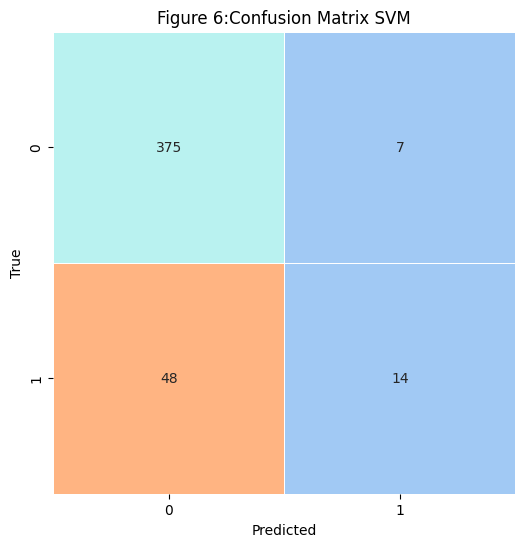

Accuracy: 0.8761261261261262
Confusion Matrix:
 [[375   7]
 [ 48  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       382
           1       0.67      0.23      0.34        62

    accuracy                           0.88       444
   macro avg       0.78      0.60      0.63       444
weighted avg       0.86      0.88      0.85       444



In [24]:
# SVM Model evaluation 

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap=colors, cbar=False, linewidths=.5, square=True) 

plt.title('Figure 6:Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the results
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", conf_matrix_svm)
print("Classification Report:\n", classification_rep_svm)

In [25]:
### PART 4 Model Comparision logistic vs SVM:

# Logistic Regression Metrics
precision_lr, recall_lr, f1_lr, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print("Logistic Regression Metrics:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

# SVM Metrics
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
print("\nSVM Metrics:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

Logistic Regression Metrics:
Precision: 0.5
Recall: 0.4032258064516129
F1 Score: 0.4464285714285714

SVM Metrics:
Precision: 0.6666666666666666
Recall: 0.22580645161290322
F1 Score: 0.3373493975903614


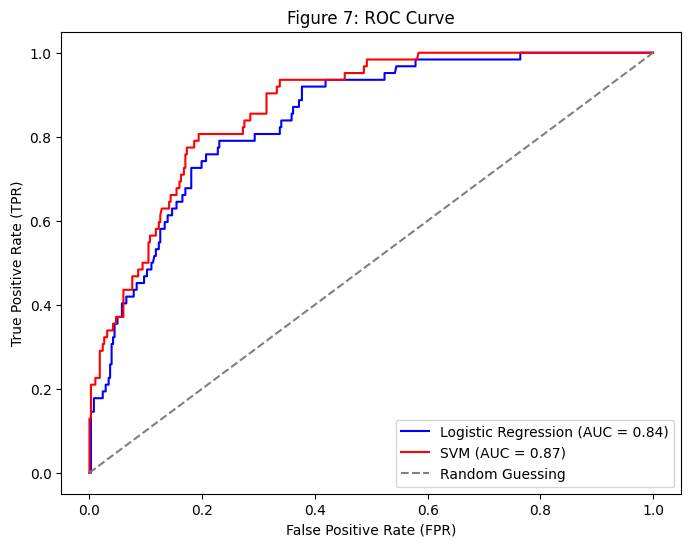

In [26]:
# Logistic Regression ROC
y_prob_lr = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

# SVM ROC
y_prob_svm = svm_model.decision_function(X_test)  # Decision function output for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plotting ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title('Figure 7: ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

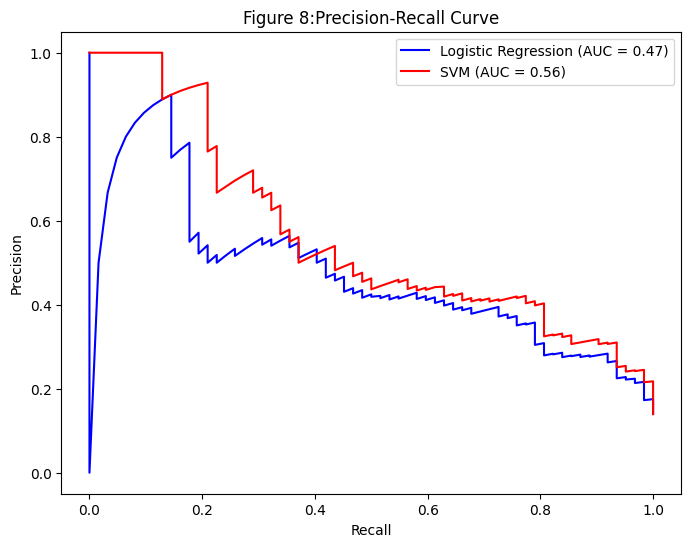

In [27]:
# Logistic Regression Precision-Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
auc_lr_pr = auc(recall_lr, precision_lr)

# SVM Precision-Recall
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
auc_svm_pr = auc(recall_svm, precision_svm)

# Plotting Precision-Recall curves
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr_pr:.2f})', color='blue')
plt.plot(recall_svm, precision_svm, label=f'SVM (AUC = {auc_svm_pr:.2f})', color='red')
plt.title('Figure 8:Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()